## PC1: Consolidación de conocimientos de Pandas, SQL y NoSQL

# Objetivo

Este proyecto tiene como objetivo consolidar conocimientos sobre la manipulación de datos con Pandas, el manejo de bases de datos relacionales (SQLite) y la preparación de los datos para una posible inserción en bases de datos no relacionales (MongoDB). El tiempo estimado de trabajo es de 2-3 horas por alumno.


# Instrucciones detalladas

# 1. Descarga de datos

- Descarga los datasets para vinos tintos y blancos desde la siguiente URL: [Wine Quality Dataset](http://archive.ics.uci.edu/dataset/186/wine+quality).
- Asegúrate de que ambos datasets se encuentren disponibles en tu entorno de trabajo como archivos CSV.
- Idealmente, intenta llevarlo a cabo de manera programática para no tener que hacer operaciones manualmente.

In [6]:
import pandas as pd
import numpy as np
import requests
import zipfile
import io
import sqlite3
import jsonlines
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Url del dataset de vinos
url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"

# Descargar archivo .zip de url
response = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(response.content))
# Extracción de los datos del fichero zip en la carpeta datasets
z.extractall("datasets")

# 2. Combinar los datos

- Usa Pandas para cargar ambos datasets en dataframes en memoria.
- Combina los datos en un único dataframe añadiendo una columna adicional que indique el tipo de vino (red o white).
- ¿Cuántos registros tenemos? ¿Cuántas variables y de qué tipo?

In [8]:
#Carga de datasets
red_wine = pd.read_csv('datasets/winequality-red.csv', sep=';')
white_wine = pd.read_csv('datasets/winequality-white.csv', sep=';')

In [9]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [11]:
#Añadir columna adicional del tipo de vino
red_wine["type"] = "red"
white_wine["type"] = "white"

#Combinar los dos dataframes en uno solo
wines = pd.concat([red_wine, white_wine], axis=0)

# Restablecer los índices para tener índices continuos y no repetidos
wines = wines.reset_index(drop=True)
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [12]:
# Función para transformar nombres de columnas
def transform_column_names(df):
    # Reemplazar espacios por _ y convertir a minúsculas
    df.columns = df.columns.str.replace(' ', '_').str.lower()
    return df

# Aplicar la transformación
wines = transform_column_names(wines)

# Verificar los nuevos nombres de columnas
print("\nNombres de columnas transformados:")
print(wines.columns.tolist())


Nombres de columnas transformados:
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol', 'quality', 'type']


In [13]:
#Calculamos numero de registros (filas) y numero de variables (columnas)
print(wines.shape)
print(f"Número de registros: {wines.shape[0]}")
print(f"Número de variables: {wines.shape[1]}")

(6497, 13)
Número de registros: 6497
Número de variables: 13


In [14]:
#Tipos de variables
wines.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

# 3. Filtrar atípicos y manejar datos ausentes

- Realiza un análisis estadístico o inspección visual de cada columna numérica para identificar valores atípicos.
- Usa Pandas para filtrar y eliminar los datos atípicos y los valores ausentes. Explica en tu entrega qué criterios utilizaste para identificar los atípicos.


#### Método usado y su explicación

El método IQR (Rango Intercuartil) para detectar valores atípicos es una técnica estadística robusta que se basa en los cuartiles de los datos.

**Cálculo de Cuartiles:**

- Q1 (Primer Cuartil): Es el valor que separa el 25% inferior de los datos
- Q3 (Tercer Cuartil): Es el valor que separa el 75% inferior de los datos
- IQR (Rango Intercuartil): Es la diferencia entre Q3 y Q1 (IQR = Q3 - Q1)

**Definición de Límites:**

- Límite Inferior = Q1 - 1.5 * IQR
- Límite Superior = Q3 + 1.5 * IQR
- El factor 1.5 es un valor estándar que proporciona un buen balance entre identificar outliers genuinos y mantener datos válidos

**Aplicación al Dataset de Vinos:**

Para cada variable numérica (por ejemplo, para 'alcohol'):

Si alcohol = 12.5:
- Q1 podría ser 9.5
- Q3 podría ser 13.0
- IQR = 13.0 - 9.5 = 3.5
- Límite Inferior = 9.5 - (1.5 * 3.5) = 4.25
- Límite Superior = 13.0 + (1.5 * 3.5) = 18.25

Si encontramos un vino con alcohol = 20%, sería considerado atípico

**Aplicación Práctica:**

Para cada columna numérica del dataset (fixed acidity, volatile acidity, etc.) realizaremos las siguientes acciones:
1. Calcular Q1, Q3 e IQR
2. Establecer los límites
3. Identificar valores fuera de estos límites
4. Calcular el porcentaje de valores atípicos

Este método nos permitirá identificar vinos con características químicas inusuales que podrían ser errores de medición o casos especiales que merecen atención particular.

In [15]:
# 1. Análisis de valores ausentes
print("\n=== ANÁLISIS DE VALORES AUSENTES ===")
missing_values = wines.isnull().sum()
print("\nValores ausentes por columna:")
print(missing_values)


=== ANÁLISIS DE VALORES AUSENTES ===

Valores ausentes por columna:
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


In [16]:
# 2. Análisis estadístico de las columnas numéricas para identificar valores atípicos
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===\n")
print(wines.describe())


=== ESTADÍSTICAS DESCRIPTIVAS ===

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.

In [17]:
import numpy as np

# 3. Análisis de valores atípicos usando el método IQR
def detect_outliers(df, columns):
    outliers_summary = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        outliers_summary[column] = {
            'total_outliers': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'min': df[column].min(),
            'max': df[column].max()
        }
    return outliers_summary
 
# Seleccionar solo columnas numéricas (excluyendo 'type' que es categórica)
numeric_columns = wines.select_dtypes(include=[np.number]).columns

print("\n=== ANÁLISIS DE VALORES ATÍPICOS ===")
outliers_info = detect_outliers(wines, numeric_columns)

print("\nResumen de valores atípicos por columna:")
for column, info in outliers_info.items():
    print(f"\n{column}:")
    print(f"  - Número de atípicos: {info['total_outliers']}")
    print(f"  - Porcentaje de atípicos: {info['percentage']:.2f}%")
    print(f"  - Rango normal: [{info['lower_bound']:.2f}, {info['upper_bound']:.2f}]")
    print(f"  - Rango actual: [{info['min']:.2f}, {info['max']:.2f}]")


=== ANÁLISIS DE VALORES ATÍPICOS ===

Resumen de valores atípicos por columna:

fixed_acidity:
  - Número de atípicos: 357
  - Porcentaje de atípicos: 5.49%
  - Rango normal: [4.45, 9.65]
  - Rango actual: [3.80, 15.90]

volatile_acidity:
  - Número de atípicos: 377
  - Porcentaje de atípicos: 5.80%
  - Rango normal: [-0.02, 0.66]
  - Rango actual: [0.08, 1.58]

citric_acid:
  - Número de atípicos: 509
  - Porcentaje de atípicos: 7.83%
  - Rango normal: [0.04, 0.60]
  - Rango actual: [0.00, 1.66]

residual_sugar:
  - Número de atípicos: 118
  - Porcentaje de atípicos: 1.82%
  - Rango normal: [-7.65, 17.55]
  - Rango actual: [0.60, 65.80]

chlorides:
  - Número de atípicos: 286
  - Porcentaje de atípicos: 4.40%
  - Rango normal: [-0.00, 0.11]
  - Rango actual: [0.01, 0.61]

free_sulfur_dioxide:
  - Número de atípicos: 62
  - Porcentaje de atípicos: 0.95%
  - Rango normal: [-19.00, 77.00]
  - Rango actual: [1.00, 289.00]

total_sulfur_dioxide:
  - Número de atípicos: 10
  - Porcentaje d

In [18]:
# Limpiamos los outliers usando el método IQR
def remove_outliers(df, columns):
    df_clean = df.copy()
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_clean = df_clean[
            (df_clean[column] >= lower_bound) & 
            (df_clean[column] <= upper_bound)
        ]
    
    return df_clean

# Seleccionar columnas numéricas
numeric_columns = wines.select_dtypes(include=[np.number]).columns

# Aplicar la limpieza
wines_clean = remove_outliers(wines, numeric_columns)

# Mostrar cuántos registros quedaron después de la limpieza
print(f"Registros originales: {len(wines)}")
print(f"Registros después de eliminar outliers: {len(wines_clean)}")
print(f"Porcentaje de datos conservados: {(len(wines_clean)/len(wines))*100:.2f}%")

Registros originales: 6497
Registros después de eliminar outliers: 4840
Porcentaje de datos conservados: 74.50%


# 4. Almacenar los datos limpios en SQLite

- Usa SQLite para almacenar el dataframe limpio en una base de datos persistente.
- Sigue la documentación oficial de SQLite: SQLite Python Documentation.


In [19]:
wines

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [20]:
wines.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

In [21]:
wines['quality'] = wines['quality'].astype(float)

In [22]:
import sqlite3

In [23]:
# Creamos una base de datos persistente (SQLite) y un objeto de conexión para conectarnos a ella
con = sqlite3.connect("wines.db")

# Creamos un cursor para ejecutar consultas SQL
cur = con.cursor()

In [24]:
# Guardamos el Dataframe wines_clean en SQLite como una tabla llamada wines_db
wines.to_sql("wines_db", con, if_exists="replace", index=False)

6497

# 5. Realizar 3 consultas en SQLite

Basándote en los datos y las columnas del dataset, realiza las siguientes consultas:

1. Consulta 1: ¿Cuál es el promedio de calidad (quality) por tipo de vino (type)?

In [25]:
#Escribimos la query
query = """
SELECT type, round(avg(quality),2) 
FROM wines_db
GROUP BY type
"""

In [26]:
# Ejecutamos la consulta
cur.execute(query)

In [27]:
# Obtenemos el resultado de la consulta
data = cur.fetchall()
#Imprimimos cada fila de la consulta
for row in data:
    print(row)

('red', 5.64)
('white', 5.88)


In [28]:
# Forma adicional de hacer la query para obtener el resultado como dataframe
calidad_media_vino = pd.read_sql_query("""
SELECT type, round(avg(quality),2) as 'avg quality'
FROM wines_db
GROUP BY type
""", con)
calidad_media_vino

,type,avg quality
0,red,5.64
1,white,5.88


2. Consulta 2: ¿Cuántos vinos tienen un nivel de alcohol superior a 10.5, agrupados por tipo?

In [29]:
#Escribimos la query
query2 = """
SELECT type, COUNT(*) 
FROM wines_db
WHERE alcohol > 10.5
GROUP BY type
"""

In [30]:
# Ejecutamos la consulta
cur.execute(query2)
# Obtenemos el resultado de la consulta
data = cur.fetchall()
#Imprimimos cada fila de la consulta
for row in data:
    print(row)

('red', 616)
('white', 2163)


In [31]:
# Forma adicional de hacer la query para obtener el resultado como dataframe
vinos_alta_graduacion = pd.read_sql_query("""
SELECT type, COUNT(*) as recuento_vinos 
FROM wines_db
WHERE alcohol > 10.5
GROUP BY type
""", con)
vinos_alta_graduacion

,type,recuento_vinos
0,red,616
1,white,2163


3. Consulta 3: Obtén el conteo de vinos por nivel de acidez (fixed acidity) agrupados en rangos (por ejemplo, de 0-5, 5-10, 10-15).

In [32]:
#Escribimos la query
query3 = """
SELECT 
CASE
    WHEN fixed_acidity <= 5 THEN '0-5'
    WHEN fixed_acidity > 5 and fixed_acidity <= 10 THEN '5-10'
    WHEN fixed_acidity > 10 and fixed_acidity <= 15 THEN '10-15'
    ELSE '+15'
END as 'fixed_acidity_levels',
COUNT(*) as 'recuento_vinos' 
FROM wines_db
GROUP BY 1
ORDER BY 1 ASC
"""

In [33]:
# Ejecutamos la consulta
cur.execute(query3)
# Obtenemos el resultado de la consulta
data = cur.fetchall()
#Imprimimos cada fila de la consulta
for row in data:
    print(row)

('+15', 5)
('0-5', 63)
('10-15', 255)
('5-10', 6174)


In [35]:
# Forma adicional de hacer la query para obtener el resultado como dataframe
vinos_nivel_acidez = pd.read_sql_query("""
SELECT 
CASE
    WHEN fixed_acidity <= 5 THEN '0-5'
    WHEN fixed_acidity > 5 and fixed_acidity <= 10 THEN '5-10'
    WHEN fixed_acidity > 10 and fixed_acidity <= 15 THEN '10-15'
    ELSE '+15'
END as 'fixed_acidity_levels',
COUNT(*) as 'recuento_vinos' 
FROM wines_db
GROUP BY 1
ORDER BY 1 ASC
""", con)
vinos_nivel_acidez

,fixed_acidity_levels,recuento_vinos
0,+15,5
1,0-5,63
2,10-15,255
3,5-10,6174


# 6. Exportar datos a JSONLines

De cara a una potencial insercion en una base de datos noSQL como mongoDB, podemos servirnos de pandas para preparar los datos.

**¿Qué estructura de datos de python es la más similar a un documento noSQL?**

La estructura de datos de python mas similar a un documento NoSQL es un diccionario.
Los diccionarios de Python son lo mas parecido a documentos JSON porque tienen pares clave-valor y pueden anidar estructuras.

**Usa Pandas para transformar los datos de una de las consultas en un archivo JSONLines.**
**Usa la librería jsonlines para guardar el archivo.**

In [38]:
# Ejecutamos de nuevo la query anterior
vinos_query_df = pd.read_sql_query("""
SELECT 
CASE
    WHEN fixed_acidity <= 5 THEN '0-5'
    WHEN fixed_acidity > 5 and fixed_acidity <= 10 THEN '5-10'
    WHEN fixed_acidity > 10 and fixed_acidity <= 15 THEN '10-15'
    ELSE '+15'
END as 'fixed_acidity_levels',
COUNT(*) as 'recuento_vinos' 
FROM wines_db
GROUP BY 1
ORDER BY 1 ASC
""", con)
vinos_query_df

,fixed_acidity_levels,recuento_vinos
0,+15,5
1,0-5,63
2,10-15,255
3,5-10,6174


In [39]:
# Convertir el DataFrame en un archivo de tipo JSONLines, donde cada linea es un JSON independiente
vinos_query_df.to_json('vinos_query_df.jsonl', orient='records', lines=True)

# Usamos la librería `jsonlines` para guardar el archivo siguiendo documentación y ejemplos
with jsonlines.open('vinos_query_df.jsonl', mode='w') as writer:
    writer.write_all(vinos_query_df.to_dict(orient='records'))

**¿Qué problemas podrían surgir al transformar un dataframe en jsonlines?**

- **Tipos de datos no serializables:**
Tipos complejos como numpy.array, datetime, set o object pueden causar errores al convertirlos a JSON.

- **Pérdida de precisión:**
Al guardar float64, Pandas los convierte a float, lo que podría perder precisión en algunos casos.

- **Datos anidados:**
Si un DataFrame tiene columnas con listas o diccionarios, Pandas puede convertirlos en cadenas de texto en lugar de objetos JSON válidos.

- **Diferencias en los tipos de datos:**
Algunos tipos en panda, como pd.Timestamp o pd.Categorical, pueden no traducirse correctamente a JSON.

**Añade una columna que sea originalmente un np.array, ¿qué sucede al transformarlo en jsonlines?**

In [40]:
df["array"] = [np.array([1, 2, 3]), np.array([4, 5, 6])]

# Convertimos al formato JSONLines
df.to_json("datos_con_array.jsonl", orient="records", lines=True)

NameError: name 'df' is not defined

Obtenemos un error ya que un numpy.array no es serializable en JSON, por lo que Pandas lo convierte en una cadena de texto.

**Añade una columna que sea originalmente un pd.datetime, ¿qué sucede al transformarlo en jsonlines?**

In [41]:
df["fecha"] = pd.to_datetime(["2025-02-01", "2025-02-15"])

# Exportamos a JSONLines
df.to_json("datos_con_fechas.jsonl", orient="records", lines=True)

NameError: name 'df' is not defined

Obtenemos de nuevo un error ya que el datetime no es serializable en JSON, y Pandas convierte el datetime en timestamp en milisegundos.

# 7. Análisis de calidad de los vinos

- Inspecciona qué caracteriza a los vinos tintos y blancos con mayor calidad (quality).
- Usa análisis estadístico, gráficos o cualquier técnica que consideres relevante para identificar patrones.

In [43]:
wines_clean

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,type
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,red
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.99590,3.28,0.54,9.2,5,red
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,red
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [45]:
# Agrupamos los datos del dataframe por calidad y tipo de vino para poder evaluar mejor un anáslisis estadístico de calidad
quality_stats = wines_clean.groupby(["quality", "type"]).mean(numeric_only=True)
quality_stats

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
quality type                                                                  
4       red         7.522222          0.462778     0.291111        4.111111   
        white       7.103125          0.340625     0.304219        4.621484   
5       red         7.718543          0.506722     0.248742        2.403808   
        white       6.923064          0.295058     0.319967        6.696211   
6       red         7.624912          0.445404     0.269579        2.358947   
        white       6.832575          0.257537     0.325321        6.174406   
7       red         8.052326          0.360988     0.349186        2.686628   
        white       6.755125          0.262807     0.325697        5.134803   

               chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
quality type                                                                    
4       red     0.076778            12.222222             46.111111  0.996362   
        white   0.047695            21.238281            122.742188  0.994166   
5       red     0.078980            18.096026             63.612583  0.996755   
        white   0.047099            35.040774            148.615321  0.994934   
6       red     0.075270            17.226316             44.708772  0.995949   
        white   0.042548            34.910723            135.901366  0.993777   
7       red     0.069128            13.883721             31.011628  0.995319   
        white   0.037855            33.553635            124.408820  0.992402   

                     ph  sulphates    alcohol  
quality type                                   
4       red    3.345556   0.550000  10.250000  
        white  3.183438   0.470313  10.198047  
5       red    3.332384   0.583344   9.879305  
        white  3.174160   0.480848   9.895618  
6       red    3.341684   0.643088  10.616667  
        white  3.190349   0.487481  10.624928  
7       red    3.324302   0.704302  11.548256  
        white  3.211001   0.495125  11.386512

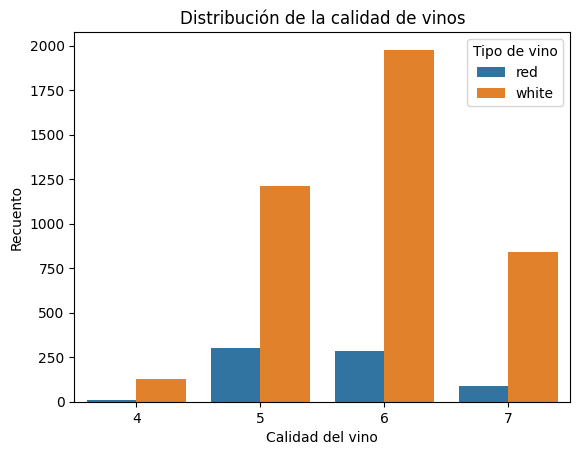

In [49]:
# Distribución de la calidad de los vinos tintos y blancos con un grafico de columnas
sns.countplot(data=wines_clean, x="quality", hue="type")
plt.title("Distribución de la calidad de vinos")
plt.xlabel("Calidad del vino")
plt.ylabel("Recuento")
plt.legend(title="Tipo de vino")
plt.show()

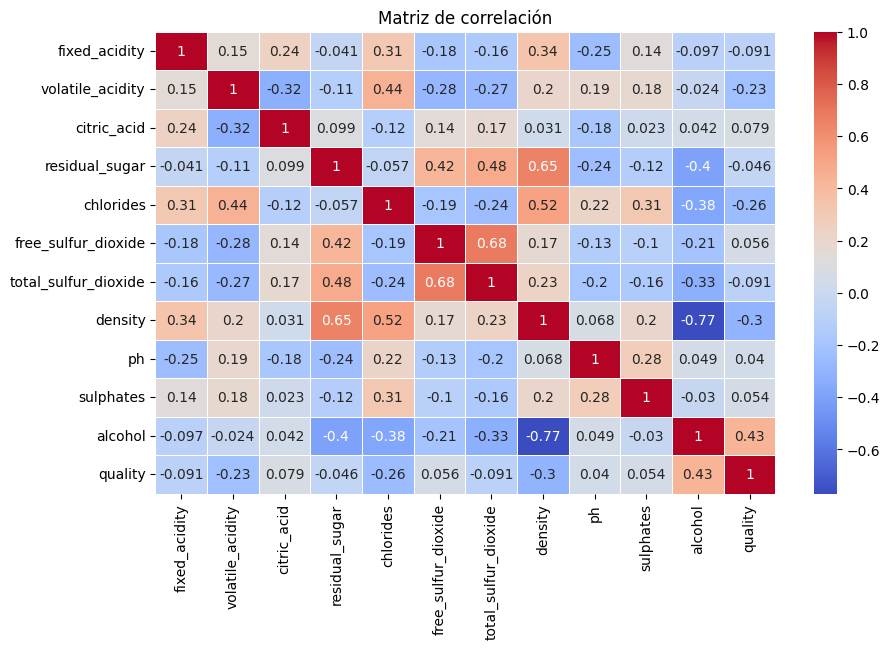

In [51]:
# Matriz de correlación para ver qué influye más en la calidad del vino
plt.figure(figsize=(10, 6))
corr_matrix = wines_clean.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

**Correlaciones encontradas más destacadas:**
- A mayor alcohol, menor densidad, menor niveles de azucar, y mayor calidad, hasta cierto punto, es decir, no implica causalidad directamente.
- A mayores niveles de acidez volátil, peor calidad.
- A mayores niveles de azúcar, mayor densidad.
- A mayor densidad, mayores niveles de acidez en general, tanto fija como volátil. 

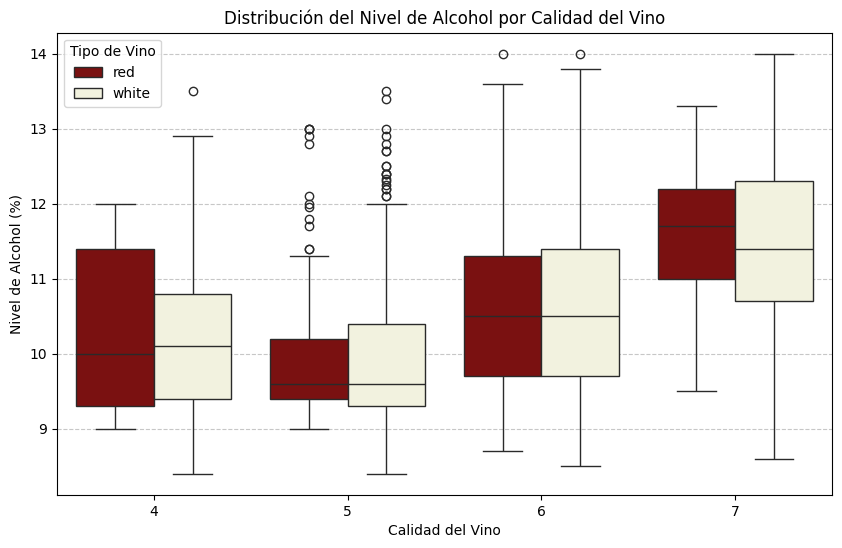

In [58]:
# Gráfico de cajas para comparar el nivel de alcohol según la calidad y el tipo de vino
plt.figure(figsize=(10, 6))
sns.boxplot(data=wines_clean, x="quality", y="alcohol", hue="type", palette={"red": "darkred", "white": "beige"})
plt.title("Distribución del Nivel de Alcohol por Calidad del Vino")
plt.xlabel("Calidad del Vino")
plt.ylabel("Nivel de Alcohol (%)")
plt.legend(title="Tipo de Vino")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

En el gráfico de cajas o boxplot podemos verificar lo que hemos visto previamente en la matriz de correlación, que a mayor nivel alcohol, la calidad de vino es mayor, es decir, hay una correlacion positiva entre ambas variables. De esta manera, esto sugiere que el alcohol es un factor clave en la percepción de un vino de mayor calidad.